<a href="https://colab.research.google.com/github/Anand1923/DSA_Assignments/blob/main/Data_Preprocessing_Case_study_Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as py

In [ ]:
data=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/titanic_dataset_7f74cdf359600caa5bff82c2bcfbd70f.xlsx')

#Resetting index

In [ ]:
data.set_index('PassengerId',inplace=True)

#Basic detail

In [ ]:
data.shape

(891, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


#Check for missing values

In [ ]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

#High number of values for column Cabin is null and will impact ML model. So the column can be dropped from dataset.Columns Age and Embarked should be filled with data.

In [ ]:
data=data.drop(columns=['Cabin'])

In [ ]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
data['Embarked'].mode()

0    S
dtype: object

Checking the skewness of data whether skewed or symmetrical.

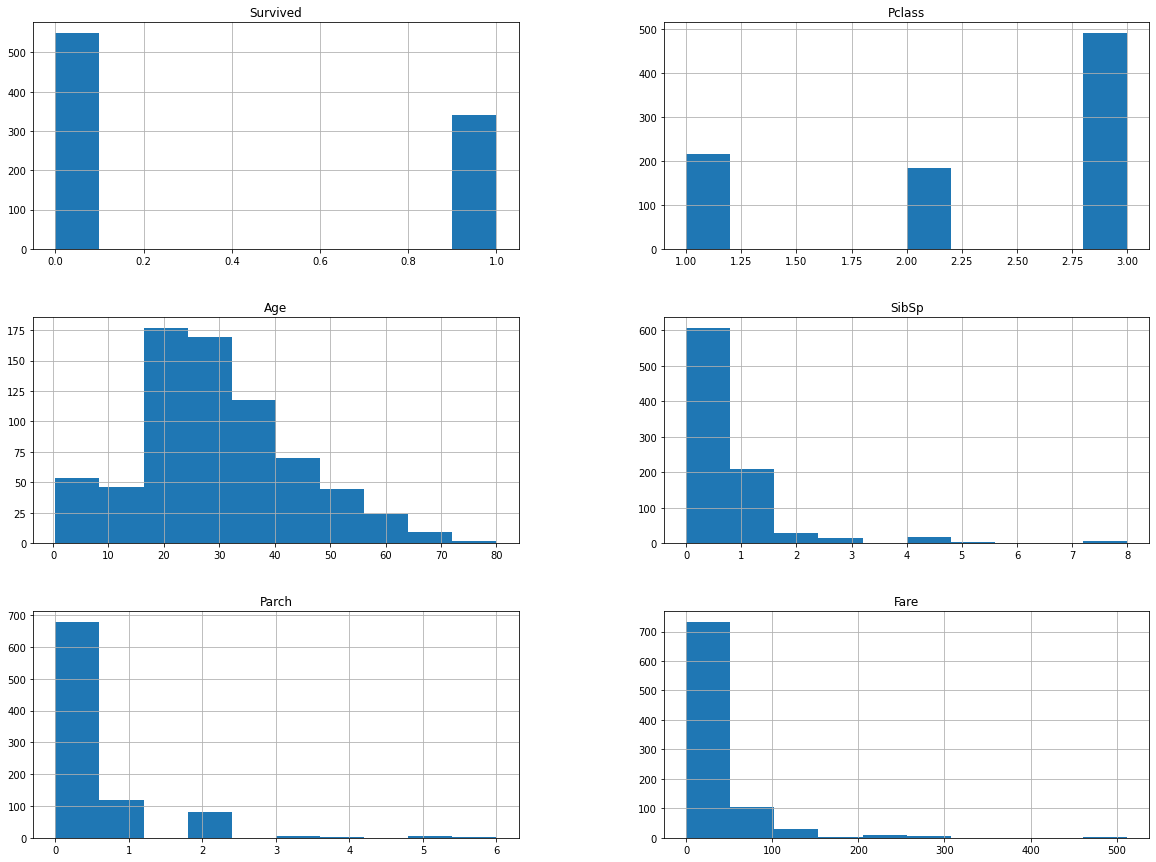

In [ ]:
graph=data.select_dtypes(include=['float','int'])
graph.hist(figsize=(20,15))
py.show()

#Distribution is skewed hence we should use median and mode to fill values.

In [ ]:
data['Age']=data['Age'].fillna(data['Age'].median())


In [ ]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode())

In [ ]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

#Checking unique values

In [ ]:
data.Name.nunique()

891

#Dropping name column as all the values are unique.

In [ ]:
data=data.drop(columns='Name')

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,female,35.0,1,0,113803,53.1000,S
5,0,3,male,35.0,0,0,373450,8.0500,S


#Finding outliers

Text(0.5, 1.0, 'Box plot')

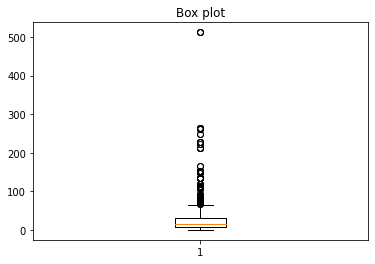

In [ ]:
py.boxplot(data['Fare'])
py.title('Box plot')

#Outliers are present for Fare and need to remove it by finding lower and upper limit

In [ ]:
q1=np.percentile(data['Fare'],25,interpolation='midpoint')
q2=np.percentile(data['Fare'],50,interpolation='midpoint')
q3=np.percentile(data['Fare'],75,interpolation='midpoint')
iqr=q3-q1
print(q1,q2,q3,iqr)

7.9104 14.4542 31.0 23.0896


In [ ]:
low=q1-1.5*iqr
up=q3+1.5*iqr

print(low,up)

-26.724 65.6344


In [ ]:
outlier=[]

for x in data['Fare']:
  if((x>up) or (x<low)):
    outlier.append(x)
    


In [ ]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

#All outliers are above upper limit

In [ ]:
a=[]
ind=data['Fare']>up

a=data.loc[ind].index

Drop the rows for above indexes

In [ ]:
data.drop((a),inplace=True)

KeyError: ignored

Text(0.5, 1.0, 'Box plot')

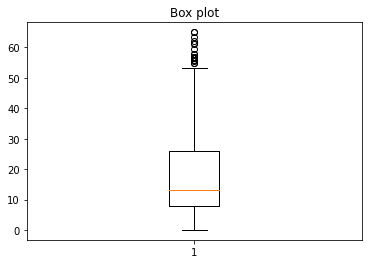

In [ ]:
py.boxplot(data['Fare'])
py.title('Box plot')

There are still some outliers present , but as it is fare and it will have a huge range of values we can consder it.

#Checking outliers for age

Text(0.5, 1.0, 'Box plot')

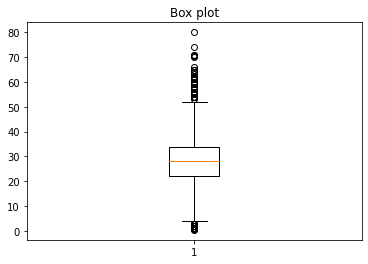

In [ ]:
py.boxplot(data['Age'])
py.title('Box plot')

In [ ]:
q1=np.percentile(data['Age'],25,interpolation='midpoint')
q2=np.percentile(data['Age'],50,interpolation='midpoint')
q3=np.percentile(data['Age'],75,interpolation='midpoint')
iqr=q3-q1
print(q1,q2,q3,iqr)



22.0 28.0 34.0 12.0


In [ ]:

low=q1-1.5*iqr
up=q3+1.5*iqr
print(low,up)

4.0 52.0


In [ ]:
outlier=[]

for x in data['Age']:
  if((x>up) or (x<low)):
    outlier.append(x)
	

In [ ]:
outlier

[54.0,
 2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 3.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 3.0,
 2.0,
 59.0,
 54.0,
 62.0,
 3.0,
 65.0,
 54.0,
 61.0,
 2.0,
 3.0,
 3.0,
 1.0,
 1.0,
 3.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 54.0,
 2.0,
 64.0,
 62.0,
 62.0,
 53.0,
 54.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 70.0,
 60.0,
 60.0,
 0.67,
 57.0,
 54.0,
 1.0,
 0.42,
 2.0,
 1.0,
 0.83,
 74.0]

In [ ]:
a=[]
ind1=data['Age']>up
a=data.loc[ind1].index
ind2=data['Age']<low
a.append(data.loc[ind2].index)


Int64Index([  7,  12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 233, 250,
            253, 281, 318, 327, 457, 468, 484, 488, 493, 494, 514, 546, 556,
            571, 572, 583, 626, 627, 631, 648, 673, 685, 695, 773, 775, 852,
              8,  17,  44,  79, 120, 165, 173, 184, 194, 206, 262, 341, 349,
            375, 382, 387, 408, 470, 480, 531, 643, 645, 756, 789, 804, 825,
            828, 832],
           dtype='int64', name='PassengerId')

In [ ]:
data.drop((a),inplace=True)	